In [1]:
#Reading Our Data Set Here
import pandas as pd
import numpy as np
import matplotlib.pyplot as mpl
%matplotlib inline
data = pd.read_csv('ex2data1.txt',names=['Test 1','Test 2','Selected?'])
data.head(n=20)

,Test 1,Test 2,Selected?
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1
8,76.098787,87.420570,1
9,84.432820,43.533393,1


In [2]:
#Describing The Data Here
data.describe()

,Test 1,Test 2,Selected?
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Text(0,0.5,'Test 2 Score')

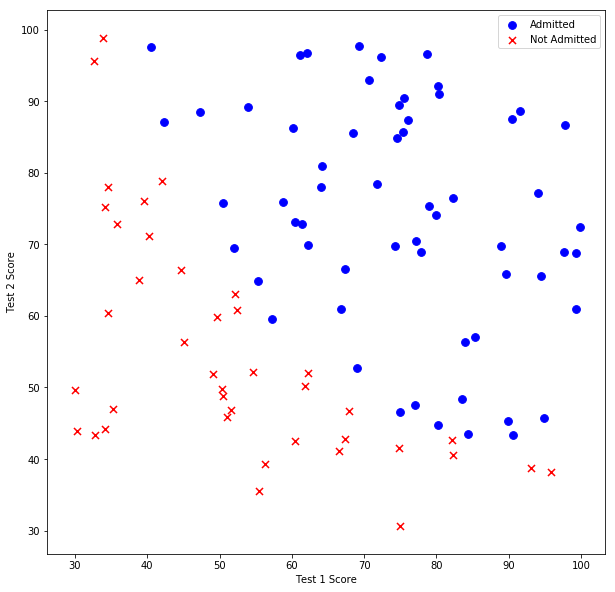

In [3]:
#Plotting The Data Here
admitted=data[data['Selected?'].isin([1])]
notAdmitted=data[data['Selected?'].isin([0])]
fig,ax=mpl.subplots(figsize=(10,10))
ax.scatter(admitted['Test 1'], admitted['Test 2'], s=60, c='b', marker='o', label='Admitted')  
ax.scatter(notAdmitted['Test 1'], notAdmitted['Test 2'], s=50, c='r', marker='x', label='Not Admitted')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

In [4]:
#Now Taking The Various Column Wise Values From The Data Set
testOneScore=data['Test 1'].values
testTwoScore=data['Test 2'].values
selected=data['Selected?'].values
print(type(testOneScore))
#Now Forming The Matrix Here
m=len(selected)
X0=np.ones(m)
X=np.array([X0,testOneScore,testTwoScore]).T
Y=np.array(selected)
theta=np.array([0,0,0])

<class 'numpy.ndarray'>


In [5]:
#Now Making The Cost Model Here
alpha=0.0011
iters=10000
def sigmoidFunc(z):
    return(1 / (1 + np.exp(-z)))
def computeCost(X,Y,theta):
    h=sigmoidFunc(X.dot(theta))
    inner=-1*(1/m)*(np.log(h).T).dot(Y)+(np.log(1-(h)).T)*(1-Y)
    return inner

In [6]:
computeCost(X,Y,theta)
#hypothesis=sigmoidFunc(X,theta)
#print(hypothesis)

array([-0.27725887, -0.27725887, -0.27725887,  0.41588831,  0.41588831,
       -0.27725887,  0.41588831,  0.41588831,  0.41588831,  0.41588831,
       -0.27725887, -0.27725887,  0.41588831,  0.41588831, -0.27725887,
        0.41588831,  0.41588831, -0.27725887,  0.41588831,  0.41588831,
       -0.27725887,  0.41588831, -0.27725887, -0.27725887,  0.41588831,
        0.41588831,  0.41588831, -0.27725887, -0.27725887, -0.27725887,
        0.41588831,  0.41588831, -0.27725887,  0.41588831, -0.27725887,
       -0.27725887, -0.27725887,  0.41588831, -0.27725887, -0.27725887,
        0.41588831, -0.27725887,  0.41588831, -0.27725887, -0.27725887,
       -0.27725887,  0.41588831,  0.41588831,  0.41588831,  0.41588831,
        0.41588831,  0.41588831,  0.41588831, -0.27725887, -0.27725887,
       -0.27725887,  0.41588831, -0.27725887,  0.41588831,  0.41588831,
        0.41588831, -0.27725887, -0.27725887, -0.27725887, -0.27725887,
       -0.27725887,  0.41588831, -0.27725887,  0.41588831,  0.41

In [7]:
#Now Defining the Gradient Descent Function
def gradientDescent(X,Y,alpha,theta,iters):
    costHistory=[0]*iters
    for iterations in range(iters):
        hypothesis=sigmoidFunc(X.dot(theta))
        #Getting The Error
        error=hypothesis-Y
        #Getting the gradient
        gradient=X.T.dot(error)/m
        #Gradient Descent
        theta=theta-alpha*gradient
        #Now getting the new cost function
        newCost=computeCost(X,Y,theta)
        costHistory[iterations]=newCost
    return costHistory,theta

In [8]:
newCost,theta=gradientDescent(X,Y,alpha,theta,100000)
print(theta)
print(newCost[-1])

[-5.15114556  0.04784697  0.04086174]
[-0.39657417  0.01681304 -0.33539994  0.15511188  0.15511188 -0.25044819
  0.15511188  0.15511188  0.15511188  0.15511188 -1.15631611 -0.39437972
  0.15511188  0.15511188 -0.46475449  0.15511188  0.15511188 -0.54167864
  0.15511188  0.15511188 -0.45338024  0.15511188 -0.23598854 -0.01148498
  0.15511188  0.15511188  0.15511188 -1.07863006 -0.47085289 -0.26854841
  0.15511188  0.15511188 -0.49958806  0.15511188 -0.39166753 -0.35651187
 -0.82619243  0.15511188 -0.60304812 -0.34156571  0.15511188 -0.22535019
  0.15511188 -0.78794315 -0.20488423 -0.51496948  0.15511188  0.15511188
  0.15511188  0.15511188  0.15511188  0.15511188  0.15511188 -0.14981399
 -0.24477078 -0.38463369  0.15511188 -0.70725046  0.15511188  0.15511188
  0.15511188 -0.038863   -0.1991755  -0.01477657 -0.39982305 -0.40466179
  0.15511188 -0.2537022   0.15511188  0.15511188  0.00436746  0.15511188
  0.15511188  0.15511188  0.15511188  0.15511188  0.15511188  0.15511188
 -0.31087884 

In [9]:
def predict(theta, X):  
    probability = sigmoidFunc(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

predictions = predict(theta, X)  
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y)]  
accuracy = (sum(map(int, correct)) % len(correct))  
print('accuracy = {0}%'.format(accuracy))  

accuracy = 91%


In [10]:
XX=(np.array([1,45,85])).T
sigmoidFunc(XX.dot(theta))

0.6166175834416155